# visiualising actuator working

In [1]:
import couchdb
server = couchdb.Server('http://foodcomputer.akg.t.u-tokyo.ac.jp:5984/')
db = server['actuator_data_point']
len(db)

589

In [2]:
%matplotlib inline
import couchdb
import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def convertToDateTimeObj(unixTime):
        return datetime.datetime.fromtimestamp(
            unixTime
        )
'''
def connectDB():
    server = couchdb.Server('http://foodcomputer.akg.t.u-tokyo.ac.jp:5984/')
    return  server['environmental_data_point']

'''

def getActuatorDataList(act_name,db,limit=1000):
    map_fun = '''function(doc) {{
        if (doc.variable == '{}')
            emit(doc.timestamp, doc.value);
    }}'''.format(act_name)
    
    row_list = db.query(map_fun, descending=True, limit=limit)
    value_list = [row.value for row in row_list]
    date_list = [convertToDateTimeObj(row.key) for row in row_list]
    
    return {"date_list":date_list, "value_list":value_list}

def plotActuatorData(act_name,limit):
    server = couchdb.Server('http://foodcomputer.akg.t.u-tokyo.ac.jp:5984/')
    db = server['actuator_data_point']
    date_value = getActuatorDataList(act_name,db, limit)
    #date_list = matplotlib.dates.date2num(date_value['date_list'])
    date_list = date_value['date_list']
    value_list = date_value['value_list']

    plt.plot(date_list,value_list,linestyle='None',marker='.')
    plt.gcf().autofmt_xdate()
    plt.show()





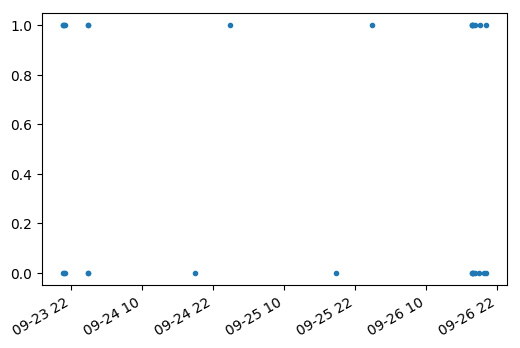

In [7]:
plotActuatorData('light_intensity_white',30)